In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17330'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.39248859882354736
{'Retrieve': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User')], 'session_id': '17330', 'previous_node': 'Retrieve', 'next': 'Modify', 'plan': None, 'task': 'plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', 'code': None, 'function_detail': 'Text between the <statcast_pitcher_documentation></statcast_pitcher_documentation> tags is documentation for the statcast_pitcher library.  Consult this section to confirm which attributes to pass into the statcast_pitcher library.\n<statcast_pitcher_documentation>\n# Statcast Pitcher\n`statcast_pitcher(start_dt=[yesterday\'s date], end_dt=None, player_id)`\n\nThe statcast function retrieves pitch-level statcast data for a given date or range or dates. \n\n## Arguments\n`start_dt:` first day for which you want to retrieve data. Defaults to yeste

{'Orchestrate': {'next': 'Execute'}}
----
Known plan. Executing with Sonnet

Executing: # 1. Import necessary libraries
from pybaseball import statcast_pitcher, playerid_lookup
from datetime import datetime 
import matplotlib.pyplot as plt

Executing: # 2. Look up Shane Bieber's player ID 
bieber_id = playerid_lookup('bieber', 'shane')

# Handle multiple players with same name by taking most recent
bieber_id = bieber_id[bieber_id['mlb_played_last'] == bieber_id['mlb_played_last'].max()]
bieber_mlbam_id = bieber_id.loc[0,'key_mlbam']

print(f"Shane Bieber's MLBAM ID is: {bieber_mlbam_id}")
Result: Gathering player lookup table. This may take a moment.
Shane Bieber's MLBAM ID is: 669456


Executing: # 3. Get Bieber's 2020 pitching data
start_date = datetime(2020, 1, 1)  
end_date = datetime(2020, 12, 31)
bieber_2020_data = statcast_pitcher(start_date, end_date, player_id=bieber_mlbam_id)
Result: TypeError('strptime() argument 1 must be str, not datetime.datetime')

Executing: start_date 

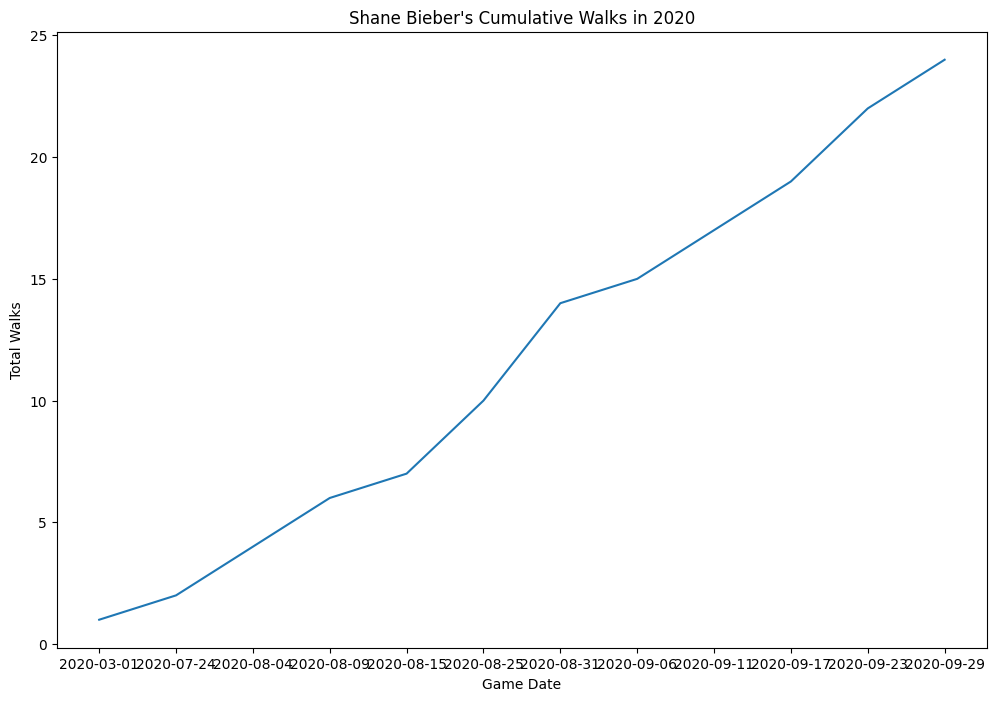

Result: This plot shows Shane Bieber's cumulative walk total over the 2020 season. He finished with 24 total walks.

Summarizing execution result
{'Execute': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content='1. Import the statcast_pitcher and playerid_lookup functions from pybaseball, as well as datetime for date handling and matplotlib for plotting:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup\nfrom datetime import datetime\nimport matplotlib.pyplot as plt\n```\n\n2. Look up Shane Bieber\'s MLBAM player ID. Handle the case where there may be multiple Shane Biebers by taking the most recent one based on mlb_played_last:\n\n```python\nbieber_id = playerid_lookup(\'bieber\', \'shane\')\nbieber_id = bieber_id[bieber_id[\'mlb_played_last\'] == bieber_id[\'mlb_played_last\'].max()]\nbieber_mlbam_id = bieber_id.loc[0,\'key_mlbam\']\n```\n\n3. Get Shane Bieber\'s st

In [6]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [7]:
task = "yes, thanks"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content='1. Import the statcast_pitcher and playerid_lookup functions from pybaseball, as well as datetime for date handling and matplotlib for plotting:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup\nfrom datetime import datetime\nimport matplotlib.pyplot as plt\n```\n\n2. Look up Shane Bieber\'s MLBAM player ID. Handle the case where there may be multiple Shane Biebers by taking the most recent one based on mlb_played_last:\n\n```python\nbieber_id = playerid_lookup(\'bieber\', \'shane\')\nbieber_id = bieber_id[bieber_id[\'mlb_played_last\'] == bieber_id[\'mlb_played_last\'].max()]\nbieber_mlbam_id = bieber_id.loc[0,\'key_mlbam\']\n```\n\n3. Get Shane Bieber\'s statcast pitching data for the 2020 season. Convert the start and end dates to datetime objects:\n\n```p